# Data Science Job Salaries - Data Analysis Project 

# Project By Piyush Kadam Using Python, Mysql and PowerBI

# Import essential libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Established connection with mysql and python jupyter notebook

In [6]:
import mysql.connector as myc

def connect_db(): 
    return myc.connect(
        host='localhost',
        user='root',
        password='Piyush@02',
        database='employee_managment_project'
    )

conn=connect_db()

print("Connections Established")

Connections Established


# Use fetchall function to see data from MySql

In [8]:
def show_tables(query):
    cursor=conn.cursor()
    cursor.execute(query)
    column_names=[i[0] for i in cursor.description]
    result=cursor.fetchall()
    cursor.close()
    return result,column_names
query="select * from salaries"
data,column_names=show_tables(query)
df=pd.DataFrame(data,columns=column_names)
df.head()



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000,USD,100000,MU,0,MU,S
1,2020,EN,CT,Staff Data Analyst,60000,CAD,44753,CA,50,CA,L
2,2020,SE,FT,Staff Data Scientist,164000,USD,164000,US,50,US,M
3,2020,EN,FT,Data Analyst,42000,EUR,47899,DE,0,DE,L
4,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L


# Checking Dimensions of table

In [10]:
df.shape

(37234, 11)

In [11]:
def show_tables(conn):
    cursor = conn.cursor()
    cursor.execute("SHOW TABLES;")
    tables = cursor.fetchall()
    cursor.close()
    return tables

# Test the connection by listing all tables
tables = show_tables(conn)
print("Tables in the database:", tables)

Tables in the database: [('emp_data',), ('salaries',)]


# Checking information about table

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37234 entries, 0 to 37233
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           37234 non-null  int64 
 1   experience_level    37234 non-null  object
 2   employment_type     37234 non-null  object
 3   job_title           37234 non-null  object
 4   salary              37234 non-null  int64 
 5   salary_currency     37234 non-null  object
 6   salary_in_usd       37234 non-null  int64 
 7   employee_residence  37234 non-null  object
 8   remote_ratio        37234 non-null  int64 
 9   company_location    37234 non-null  object
 10  company_size        37234 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.1+ MB


# Checking statistical information about table

In [15]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,37234.000000,3.723400e+04,37234.000000,37234.000000
mean,2023.656443,1.667366e+05,160540.603105,23.197884
std,0.611469,2.338090e+05,72679.876280,42.005217
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.100000e+05,110000.000000,0.000000
50%,2024.000000,1.500000e+05,150000.000000,0.000000
75%,2024.000000,2.000000e+05,200000.000000,0.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


# Checking how many null values are present or not in table

In [17]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Subchart showing Box plot for salary column , salary_in_usd column and  remote ratio column

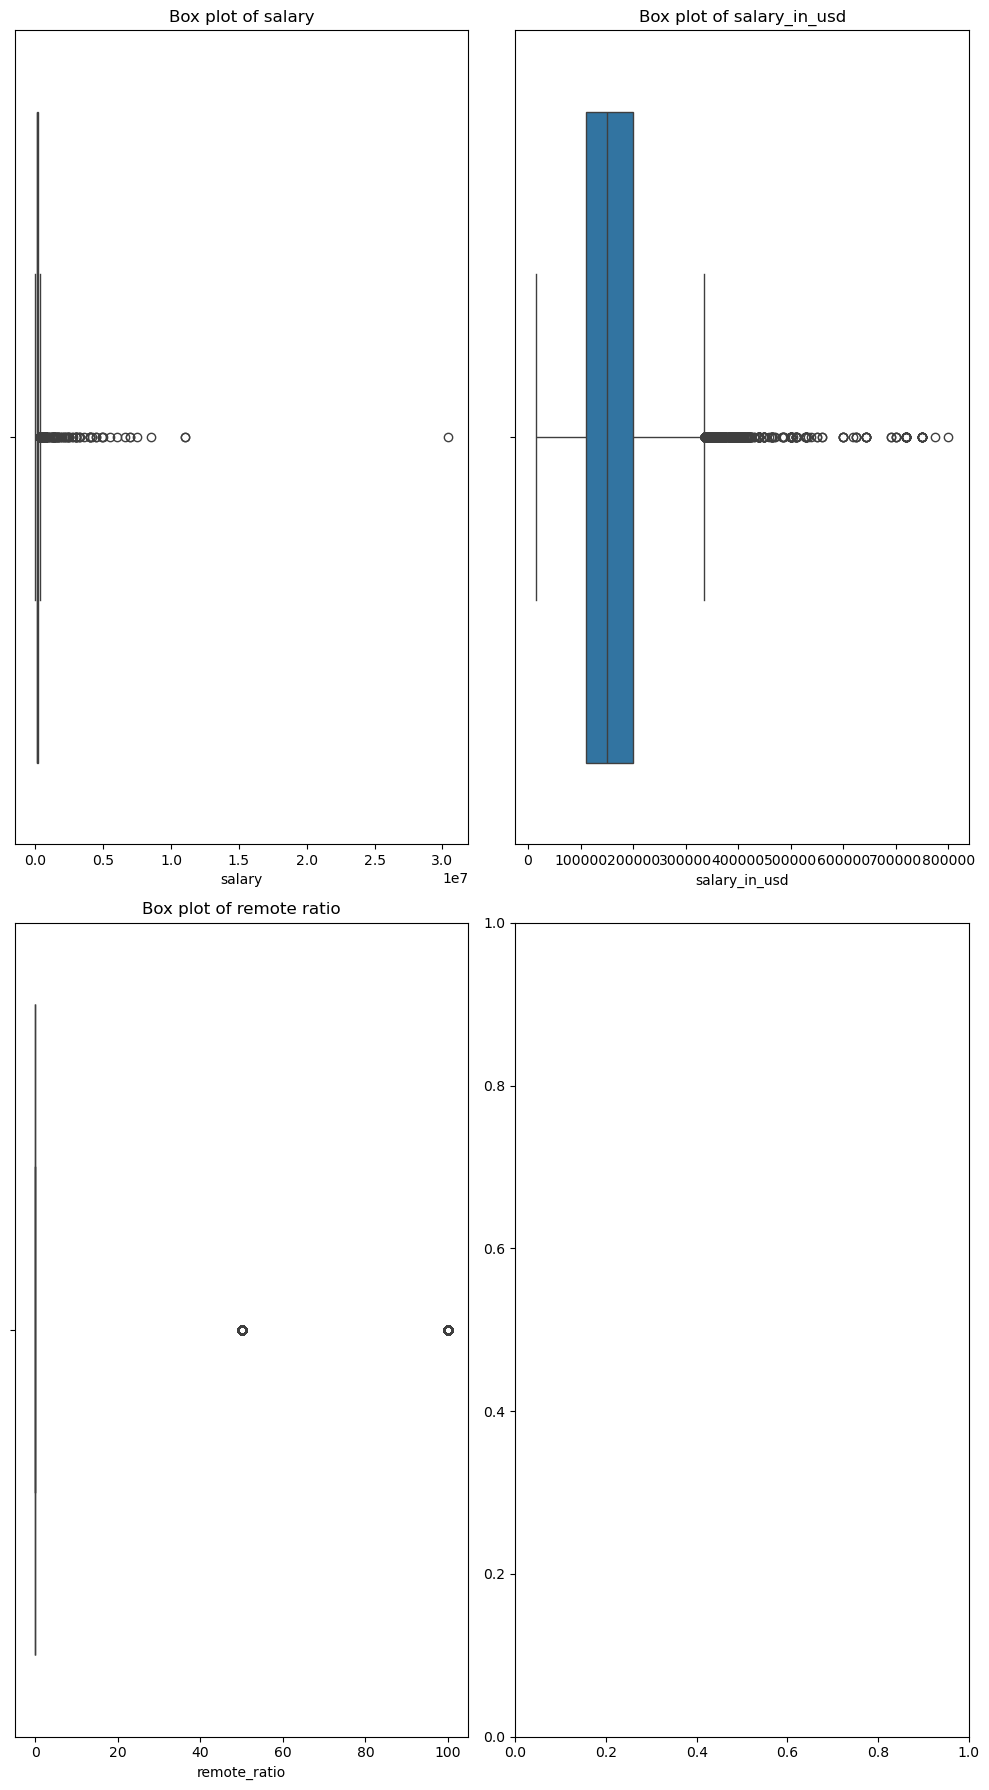

In [19]:
fig,axs=plt.subplots(2,2, figsize=(10,18)) 

sns.boxplot(x=df['salary'],ax=axs[0,0])
axs[0,0].set_title("Box plot of salary")

sns.boxplot(x=df['salary_in_usd'],ax=axs[0,1])
axs[0,1].set_title("Box plot of salary_in_usd")

sns.boxplot(x=df['remote_ratio'],ax=axs[1,0])
axs[1,0].set_title("Box plot of remote ratio")

plt.tight_layout()
plt.show()

# Cheking intial 5 rows for reference

In [21]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000,USD,100000,MU,0,MU,S
1,2020,EN,CT,Staff Data Analyst,60000,CAD,44753,CA,50,CA,L
2,2020,SE,FT,Staff Data Scientist,164000,USD,164000,US,50,US,M
3,2020,EN,FT,Data Analyst,42000,EUR,47899,DE,0,DE,L
4,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L


# Heat Map showing correlation between numerical columns

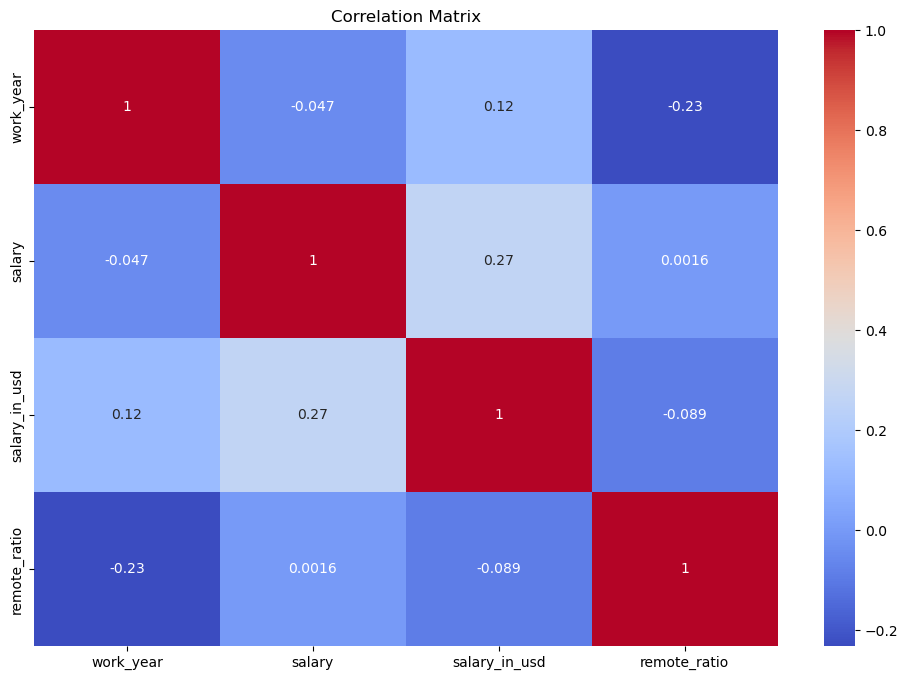

In [23]:
corr_df=df.select_dtypes(include=['float64','int64'])
correlation_matrix=corr_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Line Chart showing salary growth since year 2020 by experience level

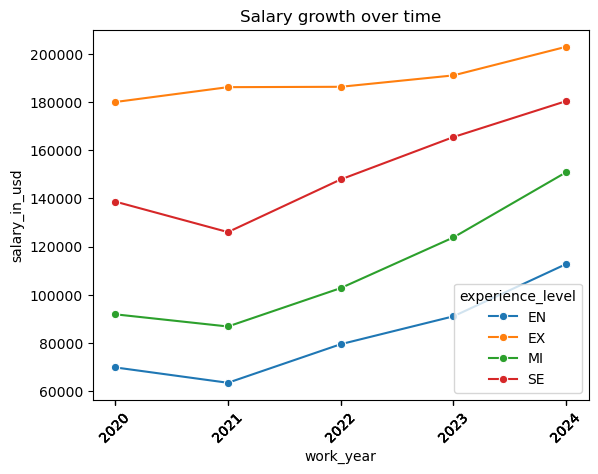

In [25]:
avg_salary_year=df.groupby(['work_year','experience_level'])['salary_in_usd'].mean().reset_index()

sns.lineplot(avg_salary_year,x='work_year',y='salary_in_usd',color='green',marker='o',hue='experience_level')
plt.title("Salary growth over time")
plt.xticks(rotation=45)
plt.xticks(ticks=avg_salary_year['work_year'],labels=avg_salary_year['work_year'])
plt.show()

# Box Plot showing Salary Distribution by Remote Work Ratio

C:\Users\PIYUSH KADAM\AppData\Local\Temp\ipykernel_27740\1737085884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', palette='viridis')


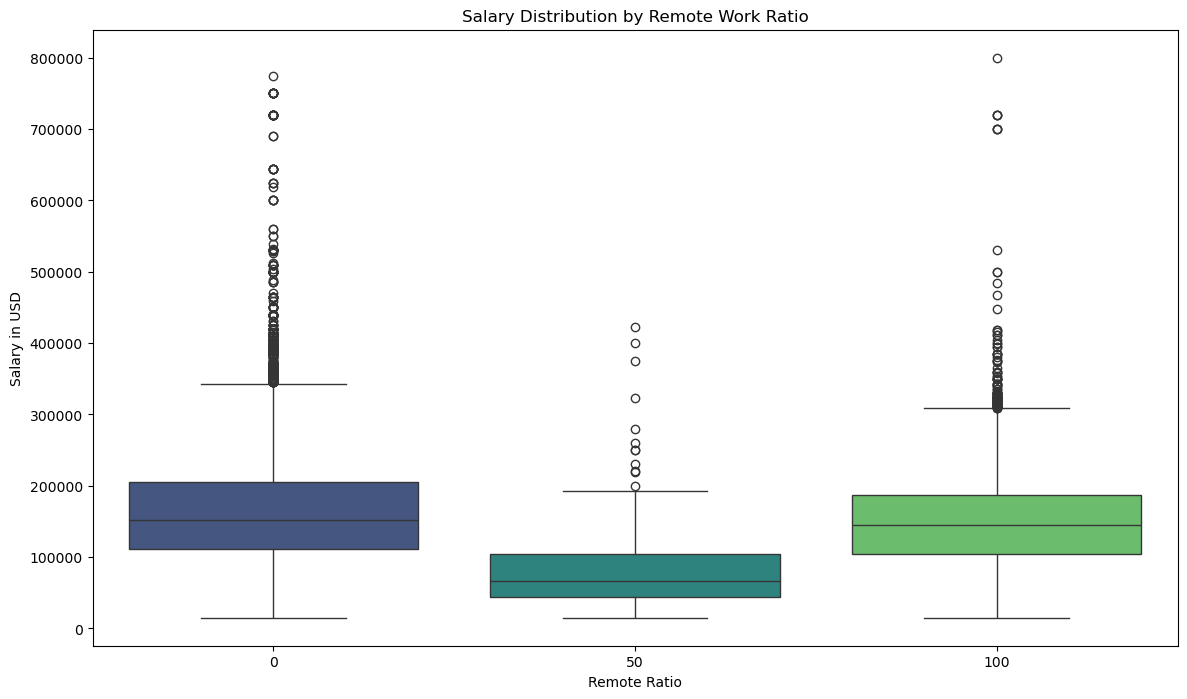

In [27]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='remote_ratio', y='salary_in_usd', palette='viridis')
plt.title('Salary Distribution by Remote Work Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()


# Histogram showing distribution of experience level

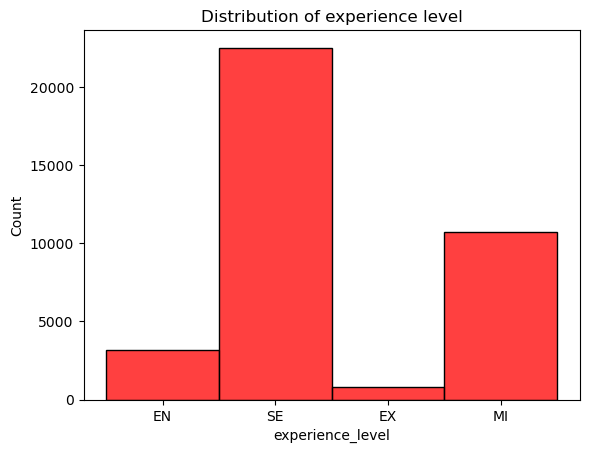

In [29]:
sns.histplot(df,x='experience_level',color='red')
plt.title("Distribution of experience level")
plt.show()

In [ ]:
! streamlit run app.py

In [30]:
print("*"*40,"Thank You !!!","*"*40)

**************************************** Thank You !!! ****************************************
